In [34]:
from datahandler import DataHandler
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

F:\Anaconda\envs\torchGPU\lib\site-packages\albumentations\__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.20 (you have 1.4.18). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [90]:
handler = DataHandler("data/building_facade/train_old", transform_sequence="jitter")
loader = DataLoader(handler, batch_size=1, shuffle=True)

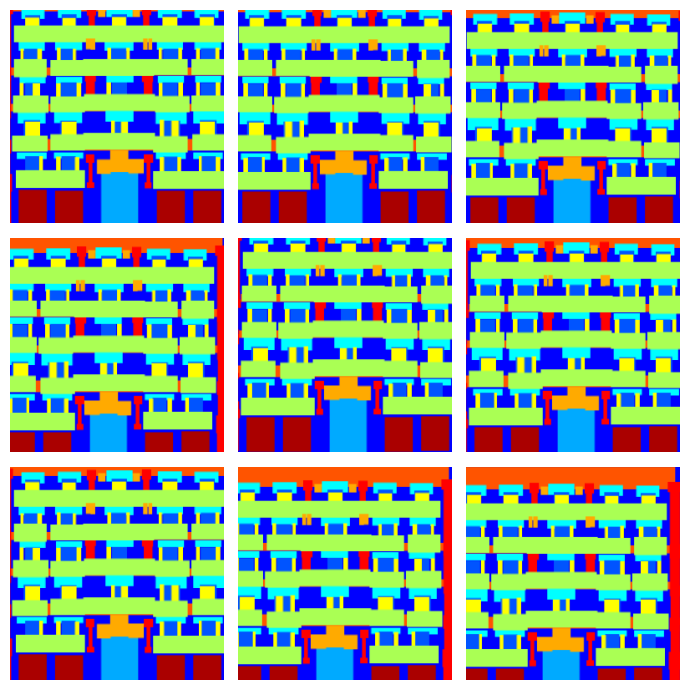

In [126]:
fig, axes = plt.subplots(figsize=(7,7), nrows=3, ncols=3)

for ax, _ in zip(axes.flatten(), range(9)):
    x, y = next(iter(loader))

    ax.imshow(x[0].permute(1, 2, 0)*0.5+0.5)
    ax.axis(False)

plt.tight_layout()
plt.show()

In [76]:
import os
from shutil import copyfile, copy

In [3]:
good = list(map(lambda x: x.split(".")[0], os.listdir("data/building_facade/good/B")))

In [6]:
bad = list(map(lambda x: x.split(".")[0], os.listdir("data/building_facade/shit/B")))

In [20]:
set(good) & set(bad)

set()

In [14]:
len(bad) == len(set(bad))

True

In [22]:
good[:3]

['cmp_b0001', 'cmp_b0002', 'cmp_b0003']

In [32]:
# go to data/building_facade/train/A and copy them to data/building_facade/good
TR_DIR = "data/building_facade/train/A/"
VAL_DIR = "data/building_facade/test/A/"

TO_TR_DIR = "data/building_facade/good/A/"
TO_VAL_DIR = "data/building_facade/shit/A/"

os.makedirs(TO_TR_DIR, exist_ok=True)
os.makedirs(TO_VAL_DIR, exist_ok=True)

for file in os.listdir(TR_DIR):
    f = file.split(".")[0]
    if f in good:
        copy(TR_DIR + f + ".png", TO_TR_DIR + f + ".png")
    else:
        copy(TR_DIR + f + ".png", TO_VAL_DIR + f + ".png")

for file in os.listdir(VAL_DIR):
    f = file.split(".")[0]
    if f in good:
        copy(VAL_DIR + f + ".png", TO_TR_DIR + f + ".png")
    else:
        copy(VAL_DIR + f + ".png", TO_VAL_DIR + f + ".png")

In [148]:
val_A = list(map(lambda x: x.split(".")[0], os.listdir(VAL_DIR)))
val_B = list(map(lambda x: x.split(".")[0], os.listdir(VAL_DIR[:-2]+"B")))

In [150]:
len(val_A)

194

In [152]:
len(val_B)

194

In [154]:
set(val_A).difference(set(val_B))

set()